# Sentiment Analysis of US Airline Tweets ✈️📊

## 📘 Introduction

In this project, we aim to perform **Sentiment Analysis** on tweets related to US airlines. The primary goal is to classify each tweet into one of three sentiment categories: **Positive**, **Neutral**, or **Negative**.

### 🔍 Objective

The main objectives of this project are:

- To understand customer opinions and emotions toward US airlines.
- To develop a machine learning model that can accurately classify sentiments based on tweet content.
- To gain insights into what factors drive negative or positive sentiments in airline-related tweets.

### 🧾 Dataset Overview

We will be using the **Twitter US Airline Sentiment** dataset, which contains tweets directed at major US airlines from February 2015. Each tweet is labeled with a sentiment (`positive`, `neutral`, or `negative`) and includes additional metadata such as:

- The airline name
- The tweet text
- The reason for negative sentiment (if applicable)
- The tweet creation date and time

### ⚙️ Tools and Technologies

The following tools and libraries will be used throughout the project:

- **Python** (programming language)
- **Pandas**, **NumPy** (data manipulation)
- **Matplotlib**, **Seaborn**, **Plotly** (visualization)
- **NLTK**, **spaCy**, **Scikit-learn**, **TextBlob** (text preprocessing and NLP)
- **Machine Learning Algorithms**: Logistic Regression, Naive Bayes, SVM, etc.

### 🧠 Methodology

The project follows a standard NLP pipeline:

1. **Data Loading & Exploration**
2. **Text Preprocessing** (cleaning, tokenization, stopword removal)
3. **Feature Engineering** (TF-IDF, Bag-of-Words, Word Embeddings)
4. **Model Training & Evaluation**
5. **Visualization of Results & Insights**

### 📈 Expected Outcomes

- A well-performing model that can classify tweet sentiments with good accuracy.
- Visual insights into public sentiment trends across different airlines.
- Understanding common issues or praise points that impact customer experience.

---

Let's begin by loading and exploring the dataset!


# 📦 Import necessary libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
from collections import Counter
from wordcloud import WordCloud

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.utils import to_categorical

In [39]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

In [12]:
from sklearn.preprocessing import LabelEncoder

# 📥 Download the dataset

In [13]:
df = pd.read_csv("hf://datasets/osanseviero/twitter-airline-sentiment/Tweets.csv")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


#🧪Analysis of the Dataset

# 👀 Display the first few rows

In [14]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# 📐 Dataset shape and column names

In [15]:
print("\n Dataset Shape:", df.shape)
print("\n Columns:", df.columns.tolist())


 Dataset Shape: (14640, 15)

 Columns: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


# 🧼 Missing values

In [16]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64



# 📊 Sentiment distribution

In [17]:
print("\n Sentiment Distribution:")
print(df['airline_sentiment'].value_counts())


 Sentiment Distribution:
airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


# 📈 Visualize sentiment distribution

<ipython-input-18-b8c9f7aac6e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df, palette='pastel')


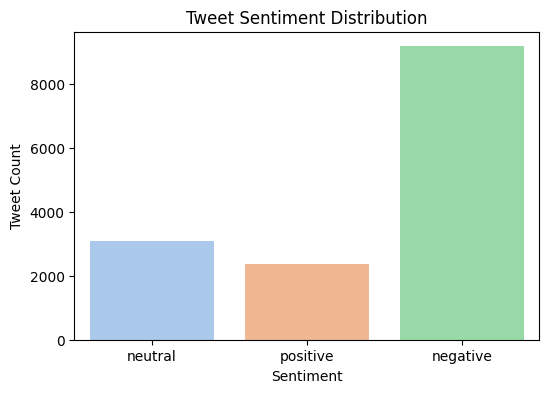

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='airline_sentiment', data=df, palette='pastel')
plt.title('Tweet Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Count')
plt.show()

# ✈️ Sentiment per airline

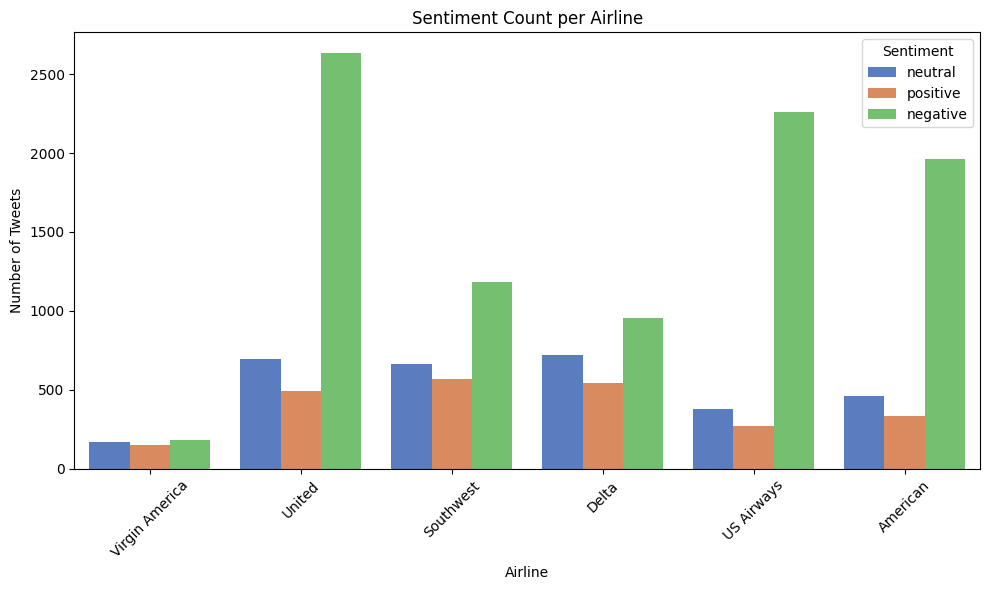

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='airline', hue='airline_sentiment', data=df, palette='muted')
plt.title('Sentiment Count per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 📝 Sample tweet from each sentiment class

In [20]:
for sentiment in ['positive', 'neutral', 'negative']:
    sample = df[df['airline_sentiment'] == sentiment]['text'].iloc[0]
    print(f"\n Sample {sentiment} tweet:\n{sample}")



 Sample positive tweet:
@VirginAmerica plus you've added commercials to the experience... tacky.

 Sample neutral tweet:
@VirginAmerica What @dhepburn said.

 Sample negative tweet:
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse


## 🧾 Dataset Overview and Cleaning Plan

The Twitter US Airline Sentiment dataset contains **14,640 tweets** directed at major US airlines. These tweets are labeled based on their sentiment: **negative (9178)**, **neutral (3099)**, or **positive (2363)**.

### 📋 Dataset Columns

Here are the key columns available in the dataset:

- `tweet_id`: Unique ID of the tweet
- `airline_sentiment`: Target variable (positive, neutral, negative)
- `airline_sentiment_confidence`: Model confidence score for the sentiment
- `negativereason`: Reason for negative sentiment (if applicable)
- `airline`: The airline mentioned in the tweet
- `text`: The actual content of the tweet
- Additional metadata like user name, location, retweet count, tweet coordinates, and timestamps

### 🧼 Missing Values

| Column                     | Missing Count |
|---------------------------|---------------|
| negativereason            | 5462          |
| negativereason_confidence | 4118          |
| airline_sentiment_gold    | 14600         |
| negativereason_gold       | 14608         |
| tweet_coord               | 13621         |
| tweet_location            | 4733          |
| user_timezone             | 4820          |

### 🧠 Relevance to Sentiment Analysis

Since our goal is to classify the **sentiment of tweets**, the following decisions are made:

- ✅ **Keep**: `airline_sentiment`, `airline`, `text`
- ❌ **Drop**: Columns with almost all missing values or irrelevant to sentiment (`airline_sentiment_gold`, `negativereason_gold`, `tweet_coord`, `user_timezone`, `tweet_location`, etc.)
- ❌ **Drop**: `negativereason` and `negativereason_confidence` — useful for fine-grained analysis, but not required for basic sentiment classification.
- ⚠️ `airline_sentiment_confidence` can be dropped unless you're using it to weight examples.

---

We will now clean the data and prepare it for text preprocessing and model building.


# 🧹 Data Cleaning & Preprocessing

# ✅ Select only relevant columns

In [21]:
df_clean = df[['airline_sentiment', 'airline', 'text']].copy()

# 🧽 Clean sentiment labels

In [22]:
df_clean['airline_sentiment'] = df_clean['airline_sentiment'].str.lower().str.strip()

# 📉 Check for duplicates and Drop duplicate tweets if any

In [23]:
print("\nDuplicate rows:", df_clean.duplicated().sum())
df_clean.drop_duplicates(inplace=True)


Duplicate rows: 188


# 🔍 Final shape

In [24]:
print("\nCleaned dataset shape:", df_clean.shape)



Cleaned dataset shape: (14452, 3)


# 👀 Preview cleaned dataset

In [25]:
df_clean.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


# ⚙️ Setup and preprocessing function

In [26]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 1]

    # Rejoin to get cleaned sentence
    return " ".join(cleaned_tokens)

# 🧽 Apply cleaning and Preview cleaned data

In [27]:
df_clean['clean_text'] = df_clean['text'].apply(clean_text)

df_clean[['text', 'clean_text']].head()

,text,clean_text
0,@VirginAmerica What @dhepburn said.,said
1,@VirginAmerica plus you've added commercials t...,plus youve added commercial experience tacky
2,@VirginAmerica I didn't today... Must mean I n...,didnt today must mean need take another trip
3,@VirginAmerica it's really aggressive to blast...,really aggressive blast obnoxious entertainmen...
4,@VirginAmerica and it's a really big bad thing...,really big bad thing


# 📊 Exploratory Data Analysis

# 📊 Word count distribution

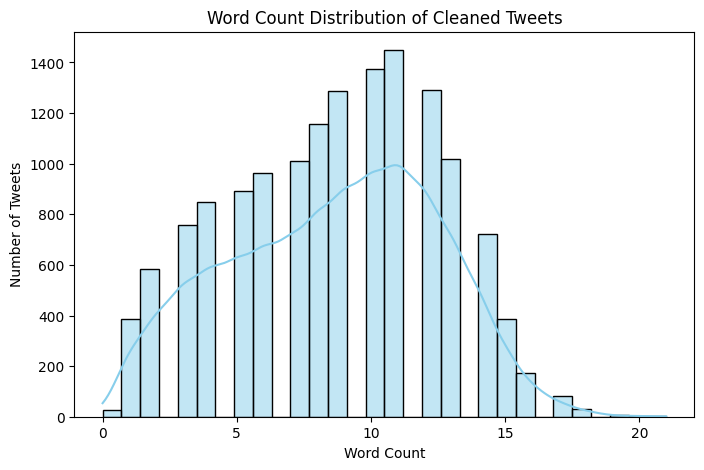

In [28]:
df_clean['word_count'] = df_clean['clean_text'].apply(lambda x: len(x.split()))

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_clean['word_count'], bins=30, kde=True, color='skyblue')
plt.title("Word Count Distribution of Cleaned Tweets")
plt.xlabel("Word Count")
plt.ylabel("Number of Tweets")
plt.show()


#⚖️ Class Balance Visualization



<ipython-input-29-01b9fac273d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline_sentiment', data=df_clean, palette='Set2')


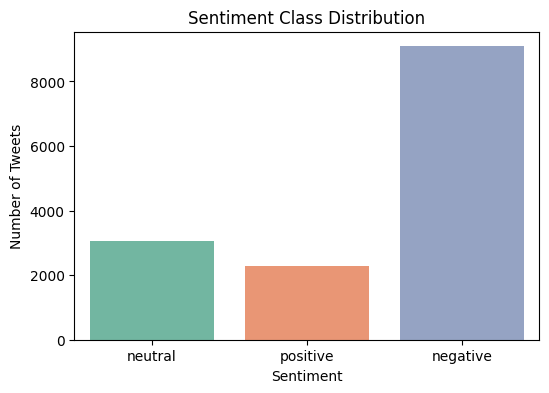

In [29]:
plt.figure(figsize=(6, 4))
sns.countplot(x='airline_sentiment', data=df_clean, palette='Set2')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


🔁 Frequent Words per Sentiment

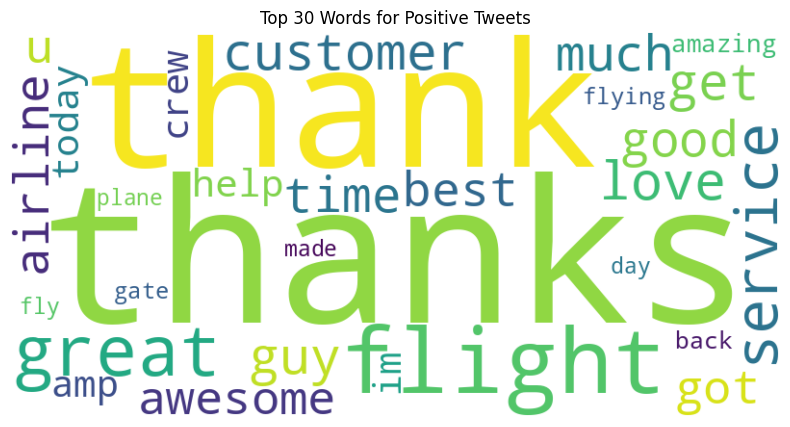

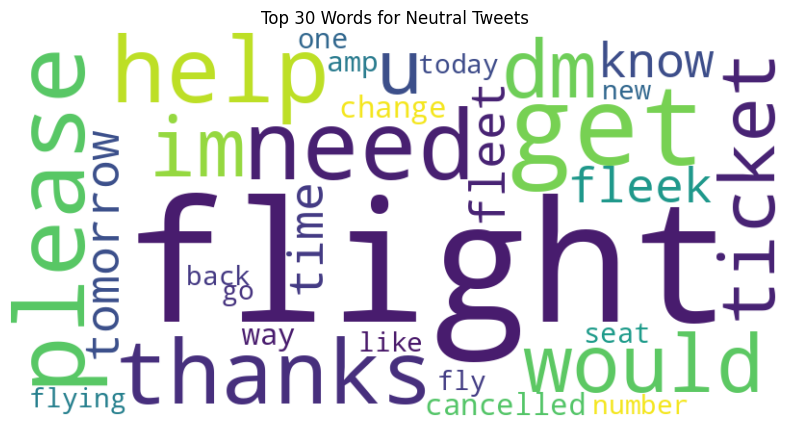

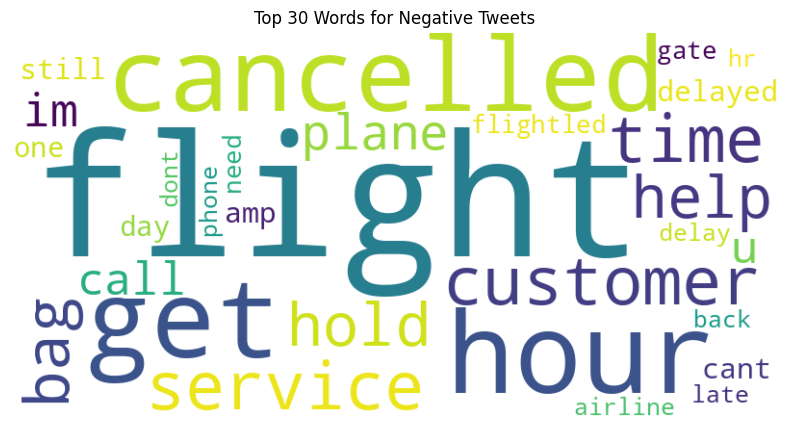

In [30]:
def plot_frequent_words(sentiment, n=30):
    words = ' '.join(df_clean[df_clean['airline_sentiment'] == sentiment]['clean_text']).split()
    common_words = Counter(words).most_common(n)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Top {n} Words for {sentiment.capitalize()} Tweets")
    plt.show()

for sentiment in ['positive', 'neutral', 'negative']:
    plot_frequent_words(sentiment)


🤪 Examples of Noisy or Sarcastic Tweets

In [31]:
sarcasm_candidates = df_clean[
    df_clean['text'].str.contains("thanks|great|awesome|love", case=False) &
    (df_clean['airline_sentiment'] == 'negative')
]

print("🧠 Possible sarcastic or noisy tweets:")
display(sarcasm_candidates[['airline_sentiment', 'text']].sample(5))


🧠 Possible sarcastic or noisy tweets:


,airline_sentiment,text
2634,negative,"@united ""most likely"" makes it sound like you ..."
2720,negative,"@united Your ""Loyalty Team"" basically flipped ..."
10103,negative,@USAirways I packed a carry on for a reason. T...
7944,negative,@JetBlue love you guys. You know that. But I p...
3862,negative,@united thanks for reaching out. The seat was ...


## 📊 EDA Summary: US Airline Sentiment Analysis

Here's a summary of the key observations from the Exploratory Data Analysis (EDA) conducted on the US Airline Tweets dataset:

### 1. ✏️ Word Count Distribution of Cleaned Tweets
- The majority of tweets have a word count between **5 and 15**.
- The distribution is **right-skewed**, indicating more short tweets than long ones.
- Very few tweets exceed **15 words**, which aligns with the nature of Twitter's character limit.

### 2. ⚖️ Sentiment Class Distribution
- The dataset is **imbalanced**, with a significantly higher number of **negative tweets** compared to **neutral** and **positive** ones.
- This imbalance highlights a common trend in customer service data, where users tend to voice dissatisfaction more often than praise.
- This class imbalance must be addressed during model training to prevent bias toward the negative class.

### 3. 😊 Top 30 Words in Positive Tweets
- Common positive words include: **"thank"**, **"thanks"**, **"customer"**, **"flight"**, **"service"**, **"great"**, **"awesome"**, and **"love"**.
- These terms suggest that positive tweets often express **gratitude**, **satisfaction**, and **appreciation** for good customer service and flight experiences.

### 4. 😠 Top 30 Words in Negative Tweets
- Frequently used negative words include: **"flight"**, **"customer"**, **"service"**, **"cancelled"**, **"delayed"**, **"hour"**, **"hold"**, and **"call"**.
- These indicate that negative tweets largely revolve around **flight disruptions**, **poor service**, **delays**, and **long wait times**.

### 5. 😐 Top 30 Words in Neutral Tweets
- Neutral tweets contain words such as: **"flight"**, **"ticket"**, **"dm"**, **"would"**, **"get"**, **"time"**, **"help"**, **"need"**, and **"thanks"**.
- These tweets often represent **inquiries**, **requests for help**, or **neutral observations** related to flight information or customer service.

---

### 🧠 Key Takeaways
- The data is heavily skewed towards **negative sentiment**, which reflects real-world customer service interaction patterns.
- **Flight delays and cancellations** are the dominant causes of negative sentiment.
- Preprocessing helped clean the text, but **sarcasm** and **ambiguous tweets** remain potential challenges.
- These insights inform the **feature selection**, **class balancing**, and **model evaluation** strategies for building an effective sentiment classifier.



# 🤖 Model Building

# 🅰️ Traditional (TF-IDF or CountVectorizer)


# 🏷️ Define input and target, TF-IDF Vectorization and Train-test split

In [32]:
X = df_clean['clean_text']
y = df_clean['airline_sentiment']

tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

print("TF-IDF feature shape:", X_train.shape)


TF-IDF feature shape: (11561, 5000)


# ✅ Model Training and Evaluation with TF-IDF Features

Accuracy: 0.7620

Classification Report:

              precision    recall  f1-score   support

    negative      0.785     0.934     0.853      1818
     neutral      0.607     0.406     0.487       613
    positive      0.803     0.557     0.657       460

    accuracy                          0.762      2891
   macro avg      0.732     0.632     0.666      2891
weighted avg      0.750     0.762     0.744      2891



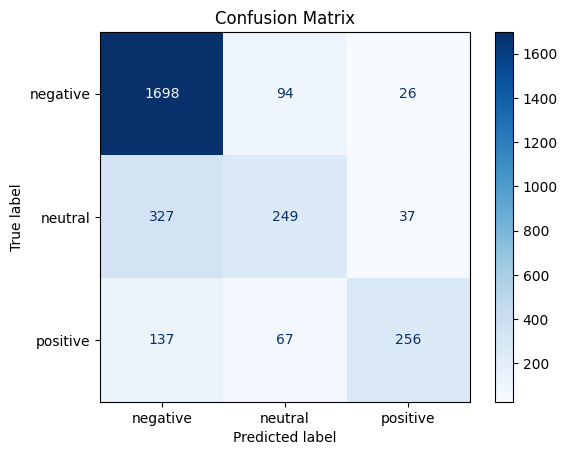

In [33]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


The model effectively classifies **negative** tweets but shows some confusion between **neutral** and **positive** sentiments.


#🅱️ Deep Learning

#🧠 Bidirectional LSTM

## ✂️ Tokenization & Padding  
## 🔤 Encode Labels  
## 🔀 Train-Test Split


In [34]:
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_clean['clean_text'])
sequences = tokenizer.texts_to_sequences(df_clean['clean_text'])

X_seq = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

le = LabelEncoder()
y_enc = le.fit_transform(df_clean['airline_sentiment'])
y_cat = to_categorical(y_enc)  # for categorical crossentropy

X_train, X_test, y_train, y_test = train_test_split(X_seq, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

print("Input shape:", X_train.shape)
print("Target shape:", y_train.shape)

Input shape: (11561, 50)
Target shape: (11561, 3)


## 🏗️ Build, Train and Evaluate Model


In [35]:
model = Sequential([
    Embedding(input_dim=20000, output_dim=100, input_length=50),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 42s 95ms/step - accuracy: 0.6470 - loss: 0.8282 - val_accuracy: 0.7373 - val_loss: 0.6027
Epoch 2/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.8191 - loss: 0.4672 - val_accuracy: 0.7891 - val_loss: 0.5443
Epoch 3/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 43s 79ms/step - accuracy: 0.8829 - loss: 0.3179 - val_accuracy: 0.7874 - val_loss: 0.5681
Epoch 4/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.9183 - loss: 0.2381 - val_accuracy: 0.7805 - val_loss: 0.6726
Epoch 5/5
326/326 ━━━━━━━━━━━━━━━━━━━━ 44s 83ms/step - accuracy: 0.9301 - loss: 0.1958 - val_accuracy: 0.7701 - val_loss: 0.7404
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.7596 - loss: 0.7748

Test Accuracy: 0.7451


## 🔍 Predict & Metrics, Classification Report and Confusion Matrix


91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Classification Report:

              precision    recall  f1-score   support

    negative       0.84      0.84      0.84      1818
     neutral       0.55      0.57      0.56       613
    positive       0.63      0.62      0.62       460

    accuracy                           0.75      2891
   macro avg       0.67      0.67      0.67      2891
weighted avg       0.75      0.75      0.75      2891



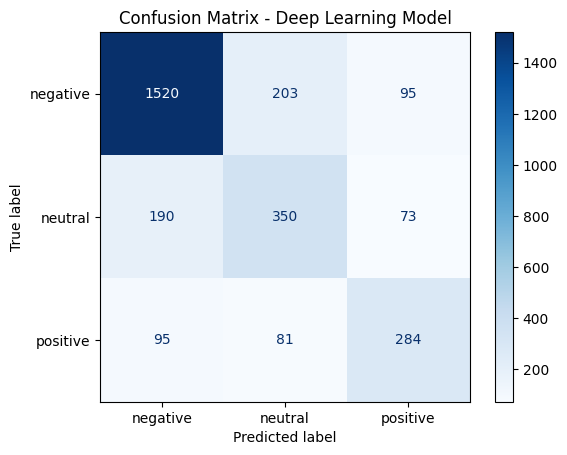

In [38]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()

## 📌 Conclusion

In this project, we performed sentiment analysis on the Twitter US Airline Sentiment dataset. After thorough preprocessing and exploratory data analysis, we built and evaluated multiple models for classification.

### ✅ Key Takeaways

- The dataset is **imbalanced**, with negative tweets being the majority class.
- **TF-IDF + Logistic Regression** achieved:
  - **Accuracy**: 76.2%
  - Best performance on negative tweets (precision = 0.78, recall = 0.93)
  - Struggled with neutral tweets (recall = 0.40)

- **Bidirectional LSTM (with embeddings)** achieved:
  - **Accuracy**: 75%
  - More balanced performance across all three classes
  - Better F1-score for neutral and positive tweets compared to TF-IDF model

### 💡 Insights

- Traditional ML with TF-IDF can perform well for well-separated classes (e.g., negative sentiment).
- Deep learning models like BiLSTM offer improved generalization across all classes, even with imbalanced data.
- Further improvements can be made using advanced methods like:
  - **Pretrained word embeddings (e.g., GloVe)**
  - **Transformer models (e.g., BERT)**
  - **Data augmentation or class balancing**

---

### 📈 Next Steps

- Integrate **BERT or GloVe embeddings** for better semantic understanding.
- Explore **oversampling/undersampling** or **class weights** to handle imbalance.
- Deploy model into a web or API-based application for real-time sentiment monitoring.

